In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib  as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# here we check missing values and columns datatypes.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# 0   car_ID            205 non-null    int64  ------> this is carID remove this column 
# 1   symboling         205 non-null    int64  
# 2   CarName           205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 3   fueltype          205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 4   aspiration        205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 5   doornumber        205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 6   carbody           205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 7   drivewheel        205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 8   enginelocation    205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 9   wheelbase         205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 10  carlength         205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 11  carwidth          205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 12  carheight         205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 13  curbweight        205 non-null    int64    Continous --> Replace the missing data with the Mean value of the column
# 14  enginetype        205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 15  cylindernumber    205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 16  enginesize        205 non-null    int64    Continous --> Replace the missing data with the Mean value of the column
# 17  fuelsystem        205 non-null    object   Non Numerical -> Replace the missing data with the Mode of the column
# 18  boreratio         205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 19  stroke            205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 20  compressionratio  205 non-null    float64  Discrete -> Replace the missing data with the Median Value of the column
# 21  horsepower        205 non-null    int64    Continous --> Replace the missing data with the Mean value of the column
# 22  peakrpm           205 non-null    int64    Continous --> Replace the missing data with the Mean value of the column
# 23  citympg           205 non-null    int64    Continous --> Replace the missing data with the Mean value of the column
# 24  highwaympg        205 non-null    int64    Continous --> Replace the missing data with the Mean value of the column
# 25  price             205 non-null    float64  Target value or label.

<AxesSubplot:xlabel='symboling'>

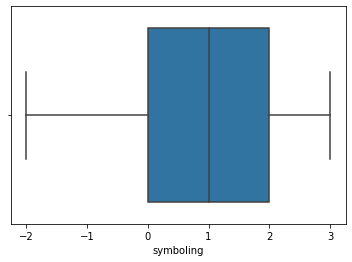

In [7]:
sns.boxplot(cars.symboling)

<AxesSubplot:xlabel='wheelbase'>

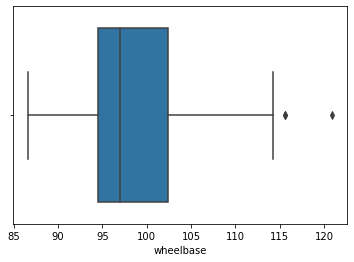

In [8]:
sns.boxplot(cars.wheelbase)

In [9]:
def outliersfreecolumn(col):
    data =  np.short(col)
    Q1,Q3 = np.percentile(data,[25,75])
    print(Q1,Q3)
    IQR =Q3-Q1
    print(IQR)
    lowerRange = Q1-(1.5 * IQR)
    upperRange = Q3+(1.5 * IQR)
    print(lowerRange, upperRange)
    
    return lowerRange, upperRange

In [10]:
lowerRange, upperRange = outliersfreecolumn(cars.wheelbase)

94.0 102.0
8.0
82.0 114.0


In [11]:
cars[(cars.wheelbase < lowerRange) | (cars.wheelbase > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
109,110,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
110,111,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
114,115,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,17075.0


In [12]:
outlierslist = list(cars[(cars.wheelbase < lowerRange) | (cars.wheelbase > upperRange)].wheelbase)
outlierslist

[115.6, 115.6, 120.9, 114.2, 114.2, 114.2, 114.2]

In [13]:
cars.wheelbase.median()

97.0

In [14]:
cars.wheelbase.replace(outlierslist,97.0,inplace=True)

In [15]:
cars[(cars.wheelbase < lowerRange) | (cars.wheelbase > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='carlength'>

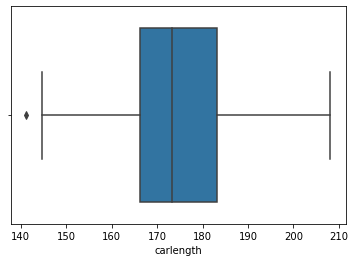

In [16]:
sns.boxplot(cars.carlength)

In [17]:
lowerRange, upperRange = outliersfreecolumn(cars.carlength)

166.0 183.0
17.0
140.5 208.5


In [18]:
cars[(cars.carlength < lowerRange) | (cars.carlength > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='carwidth'>

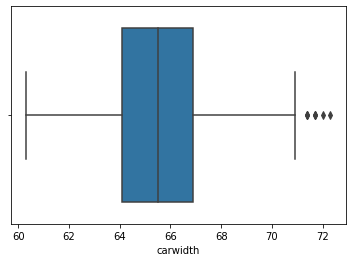

In [19]:
sns.boxplot(cars.carwidth)

In [20]:
lowerRange, upperRange = outliersfreecolumn(cars.carwidth)

64.0 66.0
2.0
61.0 69.0


In [21]:
cars[(cars.carwidth < lowerRange) | (cars.carwidth > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0


In [22]:
outlierslist = list(cars[(cars.carwidth < lowerRange) | (cars.carwidth > upperRange)].carwidth)
outlierslist

[71.4,
 71.4,
 71.4,
 70.9,
 60.3,
 69.6,
 69.6,
 70.6,
 70.3,
 70.3,
 70.3,
 71.7,
 71.7,
 70.5,
 71.7,
 72.0,
 72.3]

In [23]:
cars.carwidth.median()

65.5

In [24]:
cars.carwidth.replace(outlierslist,65.5,inplace=True)

In [25]:
cars[(cars.carwidth < lowerRange) | (cars.carwidth > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='carheight'>

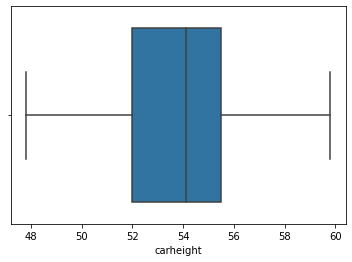

In [26]:
sns.boxplot(cars.carheight)

<AxesSubplot:xlabel='curbweight'>

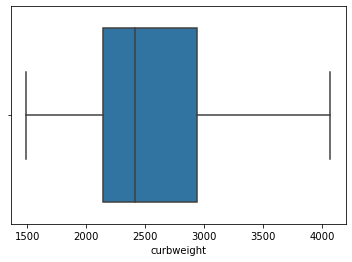

In [27]:
sns.boxplot(cars.curbweight)

<AxesSubplot:xlabel='enginesize'>

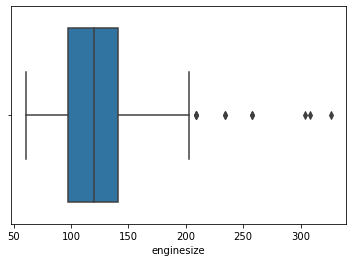

In [28]:
sns.boxplot(cars.enginesize)

In [29]:
lowerRange, upperRange = outliersfreecolumn(cars.enginesize)

97.0 141.0
44.0
31.0 207.0


In [30]:
cars[(cars.enginesize < lowerRange) | (cars.enginesize > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,97.0,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,97.0,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [31]:
outlierslist = list(cars[(cars.enginesize < lowerRange) | (cars.enginesize > upperRange)].enginesize)
outlierslist

[209, 209, 209, 258, 258, 326, 234, 234, 308, 304]

In [32]:
cars.enginesize.mean()

126.90731707317073

In [33]:
cars.enginesize.replace(outlierslist,127,inplace=True)

In [34]:
cars[(cars.enginesize < lowerRange) | (cars.enginesize > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='boreratio'>

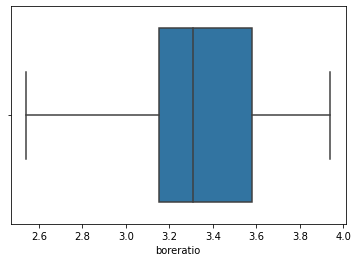

In [35]:
sns.boxplot(cars.boreratio)

<AxesSubplot:xlabel='stroke'>

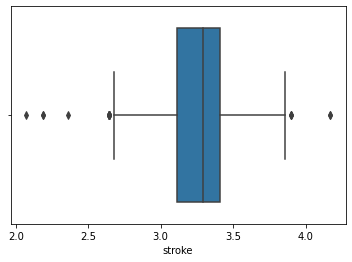

In [36]:
sns.boxplot(cars.stroke)

In [37]:
lowerRange, upperRange = outliersfreecolumn(cars.stroke)

3.0 3.0
0.0
3.0 3.0


In [38]:
cars[(cars.stroke < 2.5) | (cars.stroke > 3.8)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,127,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,127,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
83,84,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.0
84,85,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,97.0,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
124,125,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0


In [39]:
outlierslist = list(cars[(cars.stroke < 2.5) | (cars.stroke > 3.8)].stroke)
outlierslist

[3.9, 4.17, 4.17, 3.86, 3.86, 3.86, 2.19, 2.19, 3.86, 3.9, 3.9, 2.07, 2.36]

In [40]:
cars.stroke.median()

3.29

In [41]:
cars.stroke.replace(outlierslist,3.29,inplace=True)

In [42]:
cars[(cars.stroke < 2.5) | (cars.stroke > 3.8)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='compressionratio'>

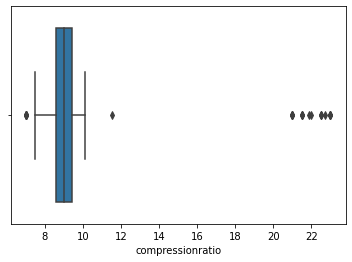

In [43]:
sns.boxplot(cars.compressionratio)

In [44]:
lowerRange, upperRange = outliersfreecolumn(cars.compressionratio)

8.0 9.0
1.0
6.5 10.5


In [45]:
cars[(cars.compressionratio < lowerRange) | (cars.compressionratio > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,127,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,97.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
108,109,0,peugeot 304,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
110,111,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,97.0,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0


In [46]:
outlierslist = list(cars[(cars.compressionratio < lowerRange) | (cars.compressionratio > upperRange)].compressionratio)
outlierslist

[11.5,
 22.7,
 22.0,
 21.5,
 21.5,
 21.5,
 21.5,
 21.9,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 22.5,
 22.5,
 22.5,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0]

In [47]:
cars.compressionratio.median()

9.0

In [48]:
cars.compressionratio.replace(outlierslist,9.0,inplace=True)

In [49]:
cars[(cars.compressionratio < lowerRange) | (cars.compressionratio > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='horsepower'>

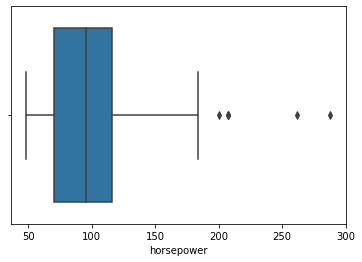

In [50]:
sns.boxplot(cars.horsepower)

In [51]:
lowerRange, upperRange = outliersfreecolumn(cars.horsepower)

70.0 116.0
46.0
1.0 185.0


In [52]:
cars[(cars.horsepower < lowerRange) | (cars.horsepower > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,127,mpfi,3.54,2.76,9.0,262,5000,13,17,36000.0
105,106,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699.0
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [53]:
outlierslist = list(cars[(cars.horsepower < lowerRange) | (cars.horsepower > upperRange)].horsepower)
outlierslist

[262, 200, 207, 207, 207, 288]

In [54]:
cars.horsepower.mean()

104.1170731707317

In [55]:
cars.horsepower.replace(outlierslist,104,inplace=True)

In [56]:
cars[(cars.horsepower < lowerRange) | (cars.horsepower > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='peakrpm'>

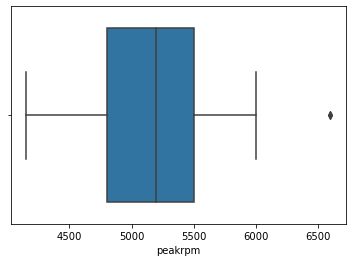

In [57]:
sns.boxplot(cars.peakrpm)

In [58]:
lowerRange, upperRange = outliersfreecolumn(cars.peakrpm)

4800.0 5500.0
700.0
3750.0 6550.0


In [59]:
cars[(cars.peakrpm < lowerRange) | (cars.peakrpm > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
165,166,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0


In [60]:
outlierslist = list(cars[(cars.peakrpm < lowerRange) | (cars.peakrpm > upperRange)].peakrpm)
outlierslist

[6600, 6600]

In [61]:
cars.peakrpm.mean()

5125.121951219512

In [62]:
cars.peakrpm.replace(outlierslist,5125,inplace=True)

In [63]:
cars[(cars.peakrpm < lowerRange) | (cars.peakrpm > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='citympg'>

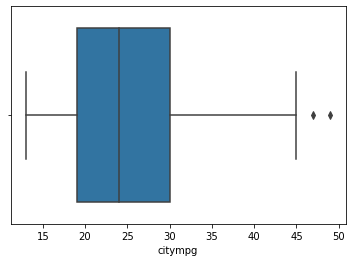

In [64]:
sns.boxplot(cars.citympg)

In [65]:
lowerRange, upperRange = outliersfreecolumn(cars.citympg)

19.0 30.0
11.0
2.5 46.5


In [66]:
cars[(cars.citympg < lowerRange) | (cars.citympg > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0


In [67]:
outlierslist = list(cars[(cars.citympg < lowerRange) | (cars.citympg > upperRange)].citympg)
outlierslist

[47, 49]

In [68]:
cars.citympg.mean()

25.21951219512195

In [69]:
cars.citympg.replace(outlierslist,25,inplace=True)

In [70]:
cars[(cars.citympg < lowerRange) | (cars.citympg > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:xlabel='highwaympg'>

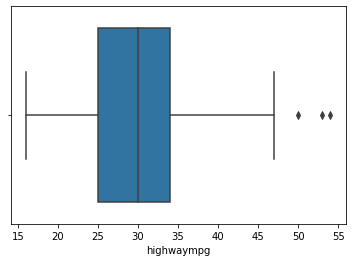

In [71]:
sns.boxplot(cars.highwaympg)

In [72]:
lowerRange, upperRange = outliersfreecolumn(cars.highwaympg)

25.0 34.0
9.0
11.5 47.5


In [73]:
cars[(cars.highwaympg < lowerRange) | (cars.highwaympg > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,25,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,25,54,6479.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,9.0,55,4800,45,50,7099.0


In [74]:
outlierslist = list(cars[(cars.highwaympg < lowerRange) | (cars.highwaympg > upperRange)].highwaympg)
outlierslist

[53, 54, 50]

In [75]:
cars.highwaympg.mean()

30.75121951219512

In [76]:
cars.highwaympg.replace(outlierslist,30,inplace=True)

In [77]:
cars[(cars.highwaympg < lowerRange) | (cars.highwaympg > upperRange)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [78]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [79]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [80]:
cars.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [81]:
cars.fueltype.replace(['gas','diesel'],[0,1],inplace=True)

In [82]:
cars.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [83]:
cars.aspiration.replace(['std','turbo'],[0,1],inplace=True)

In [84]:
cars.aspiration.value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [85]:
cars.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [86]:
cars.doornumber.replace(['four','two'],[0,1],inplace=True)

In [87]:
cars.doornumber.value_counts()

0    115
1     90
Name: doornumber, dtype: int64

In [88]:
cars.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [89]:
cars.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [90]:
cars.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [91]:
cars.enginelocation.replace(['front','rear'],[0,1],inplace=True)

In [92]:
cars.enginelocation.value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

In [93]:
cars.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [94]:
cars.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [95]:
cars.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [96]:
carsadddummies = pd.get_dummies(data=cars,columns=['fuelsystem','cylindernumber','enginetype','drivewheel','carbody','symboling'])

In [97]:
carsadddummies

,car_ID,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,alfa-romero giulia,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,2,alfa-romero stelvio,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,3,alfa-romero Quadrifoglio,0,0,1,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,1,0,0
3,4,audi 100 ls,0,0,0,0,99.8,176.6,66.2,54.3,...,0,0,1,0,0,0,0,0,1,0
4,5,audi 100ls,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),0,0,0,0,109.1,188.8,68.9,55.5,...,0,0,1,0,0,1,0,0,0,0
201,202,volvo 144ea,0,1,0,0,109.1,188.8,68.8,55.5,...,0,0,1,0,0,1,0,0,0,0
202,203,volvo 244dl,0,0,0,0,109.1,188.8,68.9,55.5,...,0,0,1,0,0,1,0,0,0,0
203,204,volvo 246,1,1,0,0,109.1,188.8,68.9,55.5,...,0,0,1,0,0,1,0,0,0,0


In [98]:
newcarsdata = carsadddummies.drop(['car_ID', 'CarName'], axis=1)
newcarsdata.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,94.5,171.2,65.5,52.4,2823,152,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,1,0,0,0,0,0,1,0


In [99]:
newcarsdata.insert(0, 'price', newcarsdata.pop('price'))
newcarsdata.head()

,price,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,13495.0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
1,16500.0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
2,16500.0,0,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,13950.0,0,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,0
4,17450.0,0,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,1,0,0,0,0,0,1,0


In [100]:
newcarsdata.columns

Index(['price', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'symboling_-2', 'symboling_-1', 'symboling_0',
       'symboling_1',

In [101]:
# 1. Pearsons Correlation Coeff

corr, pvalue = pearsonr(newcarsdata['symboling_3'],newcarsdata['price'])
if pvalue <= 0.5:
    print("Alternate Hypothesis Passed. carbody_hatchback and price have Linear Relationship")
else:
    print("Null Hypothesis Passed. carbody_hatchback and price doesnot have Linear Relationship")

Alternate Hypothesis Passed. carbody_hatchback and price have Linear Relationship


In [102]:
# 2. Spearmans Rank test
from scipy.stats import spearmanr
corr, pvalue = spearmanr(newcarsdata['symboling_3'], newcarsdata['price'])

if pvalue <= 0.5:
    print("Alternate Hypothesis Passed. carbody_hatchback and price have Linear Relationship")
else:
    print("Null Hypothesis Passed. carbody_hatchback and price doesnot have Linear Relationship")

Alternate Hypothesis Passed. carbody_hatchback and price have Linear Relationship


In [103]:
# 3. Kendall's Rank test
from scipy.stats import kendalltau
corr, pvalue = kendalltau(newcarsdata['symboling_3'], newcarsdata['price'])
 
if pvalue <= 0.5:
    print("Alternate Hypothesis Passed. carbody_hatchback and price have Linear Relationship")
else:
    print("Null Hypothesis Passed. carbody_hatchback and price doesnot have Linear Relationship")

Alternate Hypothesis Passed. carbody_hatchback and price have Linear Relationship


In [104]:
# newcarsdata['fueltype'], newcarsdata['price'] have Linear Relationship
# newcarsdata['aspiration'], newcarsdata['price'] have Linear Relationship
# newcarsdata['doornumber'], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginelocation'], newcarsdata['price'] have Linear Relationship
# newcarsdata['wheelbase'], newcarsdata['price'] have Linear Relationship
# newcarsdata['carlength'], newcarsdata['price'] have Linear Relationship
# newcarsdata['carwidth'], newcarsdata['price'] have Linear Relationship
# newcarsdata['carheight'], newcarsdata['price'] have Linear Relationship
# newcarsdata['curbweight'], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginesize'], newcarsdata['price'] have Linear Relationship
# newcarsdata['boreratio'], newcarsdata['price'] have Linear Relationship
# newcarsdata['stroke'], newcarsdata['price'] have Linear Relationship (1X)
# newcarsdata['compressionratio'], newcarsdata['price'] have Linear Relationship
# newcarsdata['horsepower'], newcarsdata['price'] have Linear Relationship
# newcarsdata['peakrpm'], newcarsdata['price'] have Linear Relationship
# newcarsdata['citympg'], newcarsdata['price'] have Linear Relationship
# newcarsdata['highwaympg'], newcarsdata['price'] have Linear Relationship
# newcarsdata['fuelsystem_1bbl'], newcarsdata['price'] have Linear Relationship
# newcarsdata['fuelsystem_2bbl'], newcarsdata['price'] have Linear Relationship
# newcarsdata['fuelsystem_4bbl'], newcarsdata['price'] have Linear Relationship--[no select]
# newcarsdata['fuelsystem_idi'], newcarsdata['price'] have Linear Relationship
# newcarsdata['fuelsystem_mfi'], newcarsdata['price'] have Linear Relationship--[no select]
# newcarsdata['fuelsystem_mpfi'], newcarsdata['price'] have Linear Relationship
# newcarsdata['fuelsystem_spdi'], newcarsdata['price'] have Linear Relationship--[no select]
# newcarsdata['fuelsystem_spfi'], newcarsdata['price'] have Linear Relationship--[no select]
# newcarsdata['cylindernumber_eight'], newcarsdata['price'] have Linear Relationship
# newcarsdata['cylindernumber_five'], newcarsdata['price'] have Linear Relationship
# newcarsdata['cylindernumber_four'], newcarsdata['price'] have Linear Relationship
# newcarsdata['cylindernumber_six'], newcarsdata['price'] have Linear Relationship
# newcarsdata['cylindernumber_three'], newcarsdata['price'] have Linear Relationship
# newcarsdata['cylindernumber_twelve'], newcarsdata['price'] have Linear Relationship
# newcarsdata['cylindernumber_two'], newcarsdata['price'] have Linear Relationship (1X)
# newcarsdata['enginetype_dohc'], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginetype_dohcv '], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginetype_l'], newcarsdata['price'] have Linear Relationship (1X)
# newcarsdata['enginetype_ohc'], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginetype_ohcf'], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginetype_ohcv'], newcarsdata['price'] have Linear Relationship
# newcarsdata['enginetype_rotor'], newcarsdata['price'] have Linear Relationship (1X)
# newcarsdata['drivewheel_4wd'], newcarsdata['price'] have Linear Relationship--[no select]
# newcarsdata['drivewheel_fwd'], newcarsdata['price'] have Linear Relationship
# newcarsdata['drivewheel_rwd'], newcarsdata['price'] have Linear Relationship
# newcarsdata['carbody_convertible'], newcarsdata['price'] have Linear Relationship
# newcarsdata['carbody_hardtop '], newcarsdata['price'] have Linear Relationship
# newcarsdata['carbody_hatchback '], newcarsdata['price'] have Linear Relationship
# newcarsdata['carbody_sedan '], newcarsdata['price'] have Linear Relationship
# newcarsdata['carbody_wagon'], newcarsdata['price'] have Linear Relationship--[no select]
# newcarsdata['symboling_-2'], newcarsdata['price'] have Linear Relationship (1X)
# newcarsdata['symboling_-1 '], newcarsdata['price'] have Linear Relationship
# newcarsdata['symboling_0 '], newcarsdata['price'] have Linear Relationship
# newcarsdata['symboling_1 '], newcarsdata['price'] have Linear Relationship
# newcarsdata['symboling_2 '], newcarsdata['price'] have Linear Relationship
# newcarsdata['symboling_3 '], newcarsdata['price'] have Linear Relationship


In [105]:
new2data =  newcarsdata.drop(['fuelsystem_4bbl', 'fuelsystem_mfi','fuelsystem_spdi','fuelsystem_spfi','drivewheel_4wd','carbody_wagon'], axis=1)
new2data.head(3)

,price,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,13495.0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,1,0,0,0,0,0,0,0,0,1
1,16500.0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,1,0,0,0,0,0,0,0,0,1
2,16500.0,0,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,0,1,0,0


In [106]:
new3data =  new2data.drop(['stroke','cylindernumber_two','enginetype_l','enginetype_rotor','symboling_-2'], axis=1)
new3data.head(3)

,price,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,13495.0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,1,1,0,0,0,0,0,0,0,1
1,16500.0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,1,1,0,0,0,0,0,0,0,1
2,16500.0,0,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,1,0,0,0,1,0,0


In [107]:
features =  new3data.iloc[:,1:].values
label = new3data.iloc[:,:1].values

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
for i in range(1,210):
    X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    modelLine = LinearRegression()
    modelLine.fit(X_train,y_train)
    
    training = modelLine.score(X_train,y_train)
    testing = modelLine.score(X_test,y_test)
    
    if testing > training:
        print("testing score: {} train score: {} seed {}".format(testing,training,i)) 

testing score: 0.9454128994374924 train score: 0.944287116686307 seed 92
testing score: 0.9461231044376657 train score: 0.942004830273926 seed 148
testing score: 0.9460041746150561 train score: 0.9387640565779786 seed 194


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=194)
modelLine = LinearRegression()
modelLine.fit(X_train,y_train)
    
training = modelLine.score(X_train,y_train)
testing = modelLine.score(X_test,y_test)
print("testing score: {} train score: {} ".format(testing,training))

testing score: 0.9460041746150561 train score: 0.9387640565779786 


In [110]:
y_pred = modelLine.predict(X_test)

In [111]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9460041746150561


In [112]:
y_preddata =  pd.DataFrame(list(zip(y_pred,y_test)),columns=['y_pred','y_test'])

In [113]:
y_pred

array([[19989.62239171],
       [ 6669.66321846],
       [ 7575.2941863 ],
       [10917.58849757],
       [12701.33916887],
       [24403.76553601],
       [19134.41066575],
       [ 5209.1870998 ],
       [13574.83313298],
       [35481.21908936],
       [17910.09559094],
       [ 6260.26433917],
       [ 7792.78309886],
       [15021.56966905],
       [ 6857.37655527],
       [10564.93342404],
       [12788.58846576],
       [15231.46274833],
       [ 6152.40545583],
       [24213.00972502],
       [14937.59908327],
       [40774.42035581],
       [ 9216.37892336],
       [10144.64200823],
       [35591.50296158],
       [ 5603.53759477],
       [13208.30468896],
       [15149.0057747 ],
       [12893.76364543],
       [ 6007.67093758],
       [ 9296.05699889],
       [ 6666.04874606],
       [ 7725.62265196],
       [ 7206.5427446 ],
       [ 6049.58499174],
       [22859.63382143],
       [20633.08634059],
       [15818.80012083],
       [33301.0066954 ],
       [ 5681.80721485],


In [114]:
y_preddata

,y_pred,y_test
0,[19989.622391706238],[17710.0]
1,[6669.663218458074],[7609.0]
2,[7575.294186304498],[7295.0]
3,[10917.588497565659],[12945.0]
4,[12701.339168871433],[10945.0]
5,[24403.76553600811],[31400.5]
6,[19134.410665746604],[17199.0]
7,[5209.187099802701],[6189.0]
8,[13574.833132976186],[11199.0]
9,[35481.21908936044],[36880.0]


In [115]:
y_preddata.to_csv('Final_predict_test_compare.csv')